In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [11]:
# Leitura dos dados
dados = pd.read_csv('../data/dados_processados/CAMPO_GRANDE_01-01-2002_A_31-12-2022_com_media_por_dia_v4.CSV')
dados = dados.drop('Unnamed: 0', axis=1)

In [12]:
# Pré-processamento
df = pd.DataFrame(dados)
df['Data'] = pd.to_datetime(df['Data'], format='%Y-%m-%d')
df['Mês'] = df['Data'].dt.month.astype(float)
df = df.dropna(axis=0, how='any')

In [13]:
# Variáveis independentes (todas as outras colunas, exceto 'PRECIP. TOTAL (mm)' e 'Data')
X = df.drop(['PRECIP. TOTAL (mm)', 'Data'], axis=1)

In [14]:
# Variável dependente
Y = df['PRECIP. TOTAL (mm)']

In [15]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=1)

In [16]:
# Lista de modelos
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor()
}


Modelo: Linear Regression
MAE: 9.225116864471712
MSE: 1806.7302654990256
R-squared: 0.9995547937955425

Modelo: Decision Tree
MAE: 1.3335934442270048
MSE: 475.78077087847123
R-squared: 0.9998827602796048

Modelo: Random Forest
MAE: 2.6293434119640544
MSE: 529.962702154183
R-squared: 0.9998694090160354

Modelo: Gradient Boosting
MAE: 3.3157600185584837
MSE: 564.1089375500891
R-squared: 0.9998609948569618


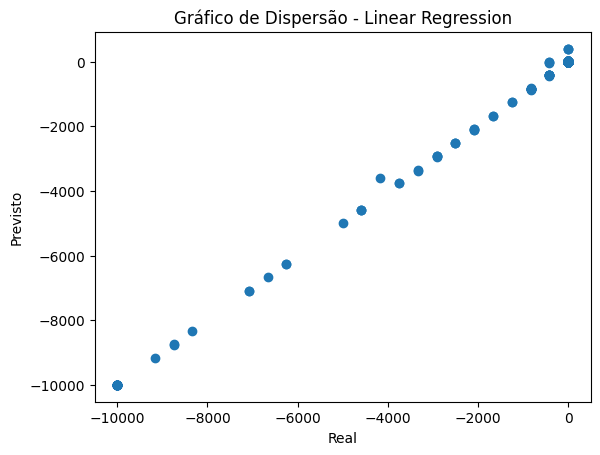

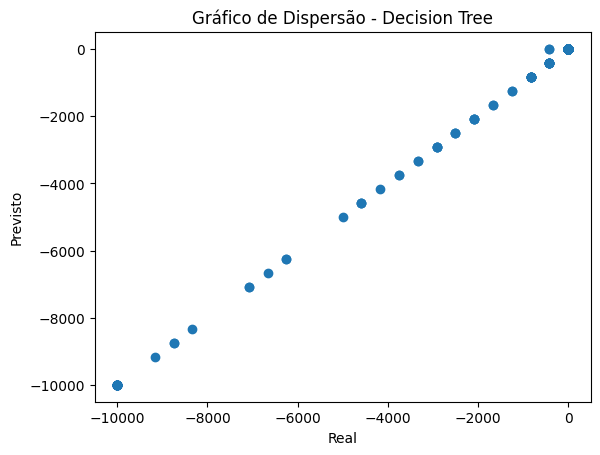

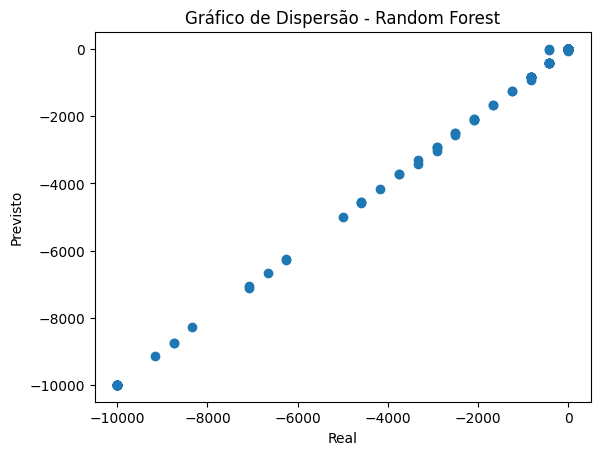

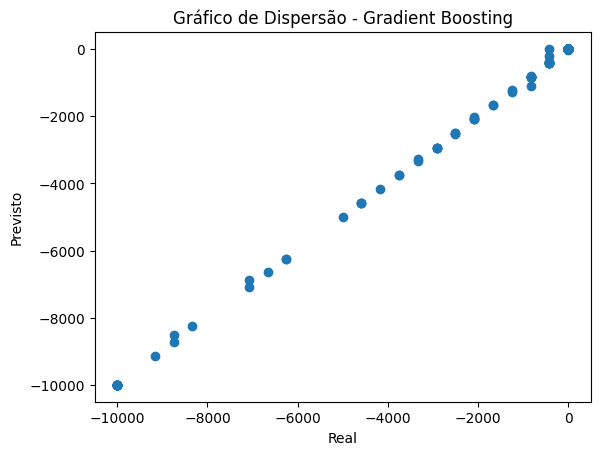

In [17]:
from matplotlib import pyplot as plt

for name, model in models.items():
    # Treinamento do modelo
    model.fit(X_train, Y_train)

    # Previsões no conjunto de teste
    previsoes = model.predict(X_test)

    # Avaliação do modelo
    mae = mean_absolute_error(Y_test, previsoes)
    mse = mean_squared_error(Y_test, previsoes)
    r2 = r2_score(Y_test, previsoes)

    # Exibindo resultados
    print(f'\nModelo: {name}')
    print(f'MAE: {mae}')
    print(f'MSE: {mse}')
    print(f'R-squared: {r2}')

    # Adicional: Exibindo gráfico de dispersão para o modelo de regressão linear
for name, model in models.items():
    # Realizar as previsões
    predictions = model.predict(X_test)

    # Plotar gráfico de dispersão
    plt.scatter(Y_test, predictions)
    plt.xlabel('Real')
    plt.ylabel('Previsto')
    plt.title(f'Gráfico de Dispersão - {name}')
    plt.savefig(f'../report/{name}.png')
    plt.show()